In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

import seaborn as sn
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv("./dataset/tirages.csv", index_col=[0])
df.shape

(7047, 147)

In [3]:
df.drop(['index'], axis=1, inplace=True)

In [4]:
df.head(5)

,num0,num1,num2,num3,num4,chance,f_1,fc_1,f_2,fc_2,...,num3_dec_2,num3_dec_3,num3_dec_4,chance_dec_3,num4_dec_0,num4_dec_1,num4_dec_2,num4_dec_3,num4_dec_4,chance_dec_4
0,31,15,33,27,36,34,1,1,1,1,...,1,0,0,1,0,0,0,1,0,0
1,10,26,42,1,4,31,0,2,2,2,...,0,0,0,1,1,0,0,0,0,0
2,44,16,47,10,15,27,1,3,3,3,...,0,0,0,0,0,1,0,0,0,0
3,2,3,35,13,1,49,0,4,0,4,...,0,0,0,0,1,0,0,0,0,1
4,30,22,11,9,23,49,1,5,1,5,...,0,0,0,0,0,0,1,0,0,1


In [5]:
#data = df.iloc[:,4:13]
target = df[['num0']] # , 'num1', 'num2', 'num3', 'num4', 'chance'

In [6]:
target.head()

,num0
0,31
1,10
2,44
3,2
4,30


In [7]:
data = df.iloc[:,6:]

In [8]:
data.head()

,f_1,fc_1,f_2,fc_2,f_3,fc_3,f_4,fc_4,f_5,fc_5,...,num3_dec_2,num3_dec_3,num3_dec_4,chance_dec_3,num4_dec_0,num4_dec_1,num4_dec_2,num4_dec_3,num4_dec_4,chance_dec_4
0,1,1,1,1,1,1,1,1,1,1,...,1,0,0,1,0,0,0,1,0,0
1,0,2,2,2,2,2,0,2,2,2,...,0,0,0,1,1,0,0,0,0,0
2,1,3,3,3,3,3,1,3,3,3,...,0,0,0,0,0,1,0,0,0,0
3,0,4,0,4,0,4,2,4,4,4,...,0,0,0,0,1,0,0,0,0,1
4,1,5,1,5,1,5,3,5,5,5,...,0,0,0,0,0,0,1,0,0,1


In [9]:
 X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=66)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6342, 140) (705, 140) (6342, 1) (705, 1)


### Régression logistique

In [15]:
rl_clf = linear_model.LogisticRegression(C = 1, max_iter=20000)
rl_clf.fit(X_train, y_train.values.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, max_iter=20000)

In [16]:
y_pred = rl_clf.predict(X_test)

rl_cm = confusion_matrix(y_test,y_pred)
print(rl_cm)

[[ 5  0  1 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 1  0  9 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  2  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  1  6]]


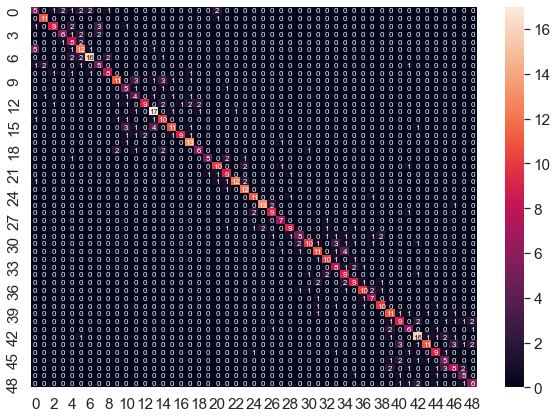

In [17]:

df_cm = pd.DataFrame(rl_cm, range(49), range(49))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}) # font size

plt.show()

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.36      0.31      0.33        16
           2       0.79      0.92      0.85        12
           3       0.75      0.56      0.64        16
           4       0.67      0.55      0.60        11
           5       0.47      0.73      0.57        11
           6       0.55      0.60      0.57        20
           7       0.80      0.70      0.74        23
           8       0.50      0.50      0.50        10
           9       0.73      0.67      0.70        12
          10       0.73      0.55      0.63        20
          11       0.36      0.62      0.45         8
          12       0.33      0.44      0.38         9
          13       0.82      0.47      0.60        19
          14       0.68      0.81      0.74        21
          15       0.53      0.71      0.61        14
          16       0.73      0.52      0.61        21
          17       0.90      0.60      0.72        15
          18       0.65    

In [27]:

probs = rl_clf.predict_proba(X_test)

y_preds = np.where(probs[:,1]>0.5,1,0)

In [28]:
print(y_test.shape, y_preds.shape)

(705, 1) (705,)


In [29]:
cm = pd.crosstab(y_test.values.ravel(), y_preds, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite,0,1
Classe réelle,,
1,16,0
2,2,10
3,16,0
4,11,0
5,11,0
6,20,0
7,23,0
8,8,2
9,12,0


In [22]:

from sklearn.metrics import roc_curve, auc
fpr, tpr, seuils = roc_curve(y_test, probs[:,1], pos_label=1)

roc_auc = auc(fpr, tpr)

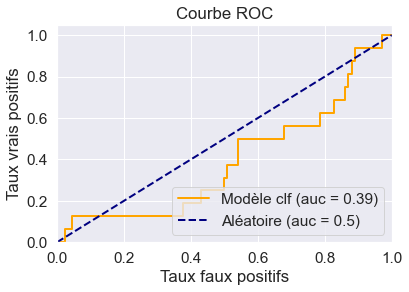

In [23]:
plt.plot(fpr, tpr, color='orange',
         lw=2, label='Modèle clf (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

Plus la courbe se rapproche du point (0,1) (en haut à gauche), meilleures sont les prédictions. Un modèle avec une sensibilité et une spécificité égales à 1 est considéré comme parfait.